# Insurance Cost Project - Codecademy Machine Learning and Data Science
***

### 1.0 Import Modules

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub


### 1.1 Import Data: [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance)

In [44]:
from kagglehub import KaggleDatasetAdapter

""" # IMPORT DATA FROM KAGGLE USING KAGGLEHUB API
file_path = "insurance.csv"
df_insurance = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS, "mirichoi0218/insurance", file_path)
df_insurance.to_csv("local_insurance.csv", index=False)
"""

insurance_df = pd.read_csv("local_insurance.csv")

def data_overview():
    pd.set_option('display.float_format', '{:.2f}'.format)
    data_dict = {'Head':insurance_df.head(),
                 'Shape':insurance_df.shape,
                 'Info':insurance_df.info(),
                 'Describe':insurance_df.describe(),
                 'Columns':insurance_df.columns}
    for j in data_dict.keys():
        print('\n', j,'\n', f'{data_dict[j]}')

data_overview()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

 Head 
    age     sex   bmi  children smoker     region  charges
0   19  female 27.90         0    yes  southwest 16884.92
1   18    male 33.77         1     no  southeast  1725.55
2   28    male 33.00         3     no  southeast  4449.46
3   33    male 22.70         0     no  northwest 21984.47
4   32    male 28.88         0     no  northwest  3866.86

 Shape 
 (1338, 7)

 Info 
 None

 Describe 
           age     bmi  children  charges
count 1338.00 1338.00   1338.00  13

### 1.2 Exploratory Data Analysis (EDA)

In [45]:
# Searching for nulls
null_sum = insurance_df.isnull().sum().sum()
null_is_one = null_sum == 1
print(f"There {'is' if null_is_one else 'are'} {null_sum} "
      f"null value{'' if null_is_one else 's'} in the dataset!")

# Number of samples
print(f"There are {insurance_df.shape[0]} samples in the dataset.\n")

# Categorical features distribution
print("Categorical Features distribution:")
print(insurance_df.describe(include=['object']).T.drop(['count'], axis=1))

# Male to Female ratio - How balanced is the dataset
total_count = insurance_df.shape[0]
male_count = insurance_df['sex'].value_counts().iloc[0]
female_count = insurance_df.shape[0] - male_count

print(f'\nmale: \t{male_count}'
      f'\nfemale:\t{female_count}'
      f'\nratio:\t{male_count/total_count * 100:.0f}:'
      f'{female_count/total_count * 100:.0f}')

# Smoker to Non-smoker ratio - How balanced is the dataset
count_smokers = insurance_df['smoker'].value_counts().iloc[1]
count_non_smokers = insurance_df.shape[0] - count_smokers

print(f'\nsmoker:\t\t{count_smokers}'
      f'\nnon-smoker:\t{count_non_smokers}'
      f'\nratio:\t\t{count_smokers/total_count * 100:.0f}:'
      f'{count_non_smokers/total_count * 100:.0f}')

# Region distribution
region_values = insurance_df['region'].value_counts()
se = region_values.iloc[0]
sw = region_values.iloc[1]
nw = region_values.iloc[2]
ne = region_values.iloc[3]

print(f'\nRegion Distribution \n(NW : NE : SE : SW)'
      f'\n {nw/total_count*100:.0f} : {ne/total_count*100:.0f} : '
      f'{se/total_count*100:.0f} : {sw/total_count*100:.0f}')


There are 0 null values in the dataset!
There are 1338 samples in the dataset.

Categorical Features distribution:
       unique        top  freq
sex         2       male   676
smoker      2         no  1064
region      4  southeast   364

male: 	676
female:	662
ratio:	51:49

smoker:		274
non-smoker:	1064
ratio:		20:80

Region Distribution 
(NW : NE : SE : SW)
 24 : 24 : 27 : 24


### 1.2.1 Display Sex and Smoker distribution as pd.DataFrame Table


Male population: 676
            mean     min     50%      max
age        38.92   18.00   39.00    64.00
bmi        30.94   15.96   30.69    53.13
smoker      0.24    0.00    0.00     1.00
charges 13956.75 1121.87 9369.62 62592.87

Female population: 662
            mean     min     50%      max
age        39.50   18.00   40.00    64.00
bmi        30.38   16.82   30.11    48.07
smoker      0.17    0.00    0.00     1.00
charges 12569.58 1607.51 9412.96 63770.43

Smoker population: 274
            mean      min      50%      max
age        38.51    18.00    38.00    64.00
bmi        30.71    17.20    30.45    52.58
smoker      1.00     1.00     1.00     1.00
charges 32050.23 12829.46 34456.35 63770.43

Non-Smoker population: 1064
           mean     min     50%      max
age       39.39   18.00   40.00    64.00
bmi       30.65   15.96   30.35    53.13
smoker     0.00    0.00    0.00     0.00
charges 8434.27 1121.87 7345.41 36910.61


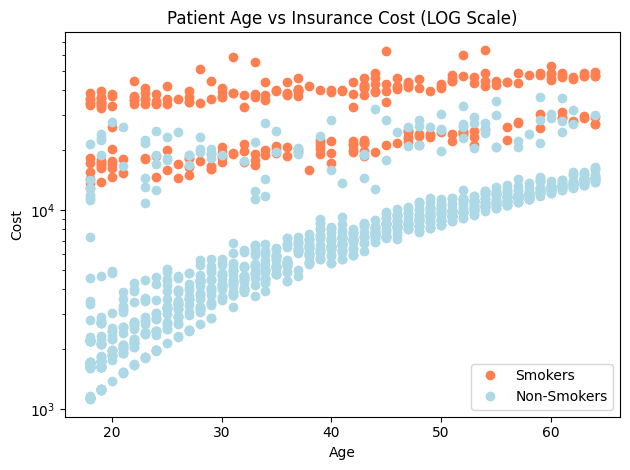

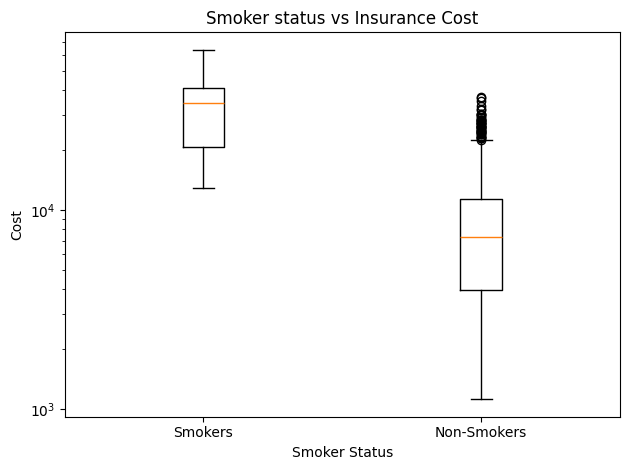

<Figure size 640x480 with 0 Axes>

In [46]:
# Display male v. female and smoker v. non-smoker using DataFrame tables
# set float_format to two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# subsitute 1 and 0 for 'yes' and 'no'
insurance_df['smoker'] = insurance_df['smoker'].map({'yes':1,'no':0})

# Number of children is later determined to be irrelevant (Lasso Regularization Coefficient is v low)
# Most important features (using Lasso coef) are smoker status, age, and bmi.
male_df = insurance_df[insurance_df['sex'] == 'male'].drop(['children'], axis=1)
female_df = insurance_df[insurance_df['sex'] == 'female'].drop(['children'], axis=1)

print(f'\nMale population: {male_df.shape[0]}')
print(male_df.describe(percentiles = [0.5]).drop(['count','std']).T)
print(f'\nFemale population: {female_df.shape[0]}')
print(female_df.describe(percentiles = [0.5]).drop(['count','std']).T)


smoker_df = insurance_df[insurance_df['smoker'] == 1].drop(['children'],axis=1)
non_smoker_df = insurance_df[insurance_df['smoker'] == 0].drop(['children'],axis=1)

print(f'\nSmoker population: {smoker_df.shape[0]}')
print(smoker_df.describe(percentiles = [0.5]).drop(['count','std']).T)
print(f'\nNon-Smoker population: {non_smoker_df.shape[0]}')
print(non_smoker_df.describe(percentiles = [0.5]).drop(['count','std']).T)


plt.plot(smoker_df['age'],smoker_df['charges'], 'o',color='coral')
plt.plot(non_smoker_df['age'],non_smoker_df['charges'], 'o',color='lightblue')
plt.title('Patient Age vs Insurance Cost (LOG Scale)')
plt.xlabel('Age')
plt.ylabel('Cost')
plt.yscale('log')
plt.legend(['Smokers','Non-Smokers'])
plt.tight_layout()
plt.show()
plt.clf()

plt.boxplot([smoker_df['charges'],non_smoker_df['charges']], showmeans=False,tick_labels=['Smokers','Non-Smokers'])
plt.title('Smoker status vs Insurance Cost')
plt.xlabel('Smoker Status')
plt.ylabel('Cost')
plt.yscale('log')
plt.tight_layout()
plt.show()
plt.clf()

# restore default float_format for DataFrame tables
pd.reset_option('display.float_format')


### 1.3 Column Variable Assignment

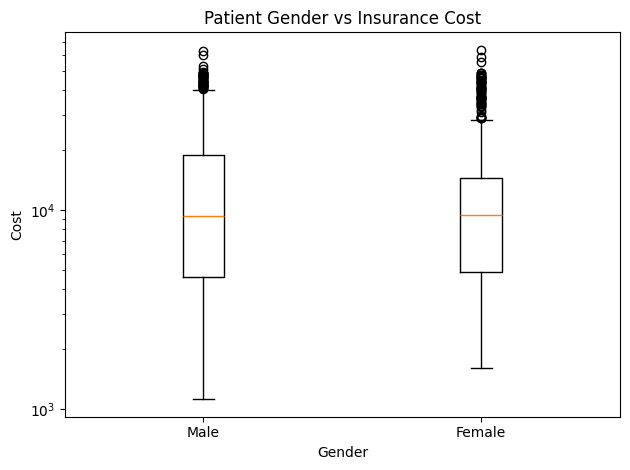

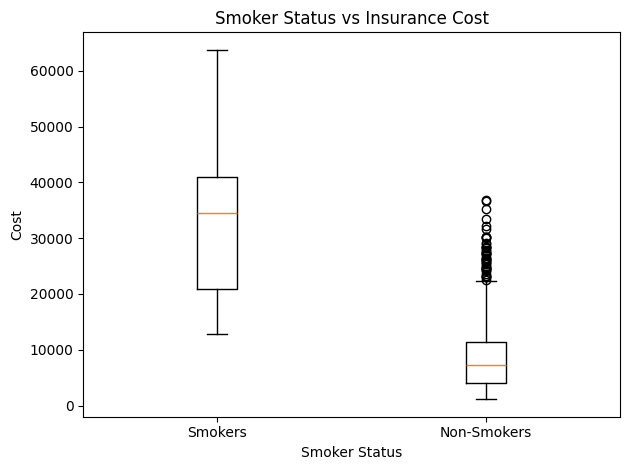

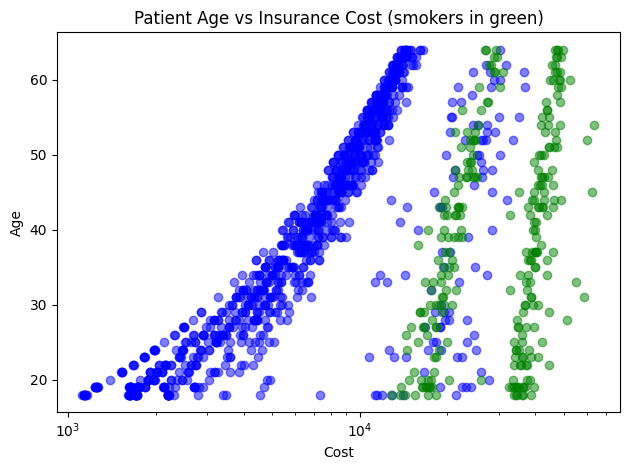

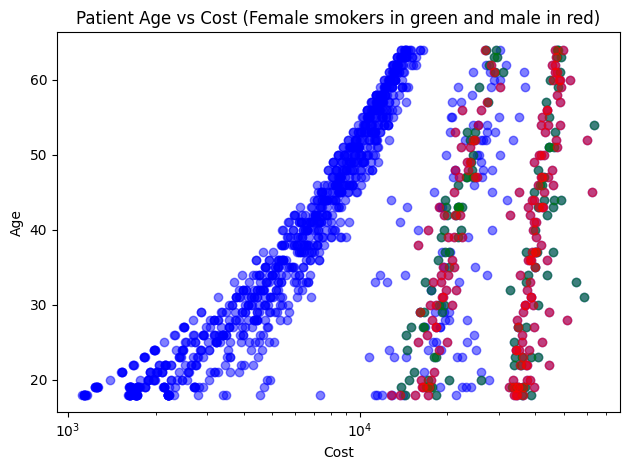

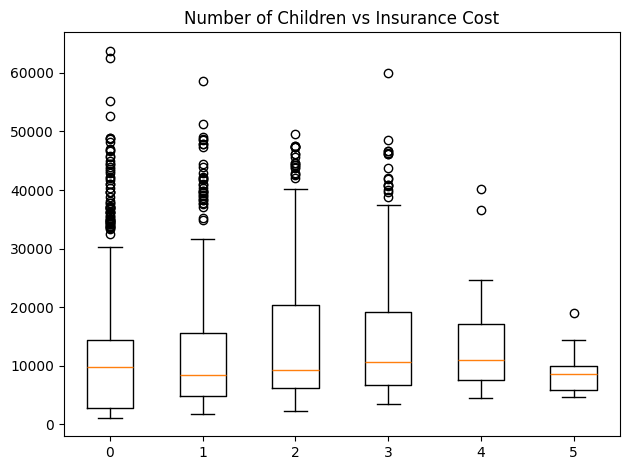

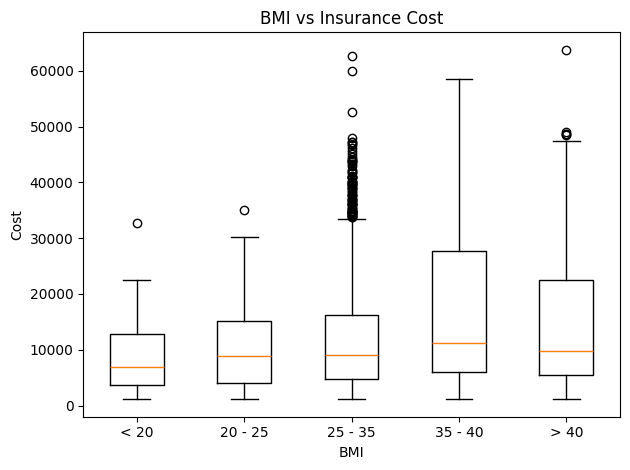

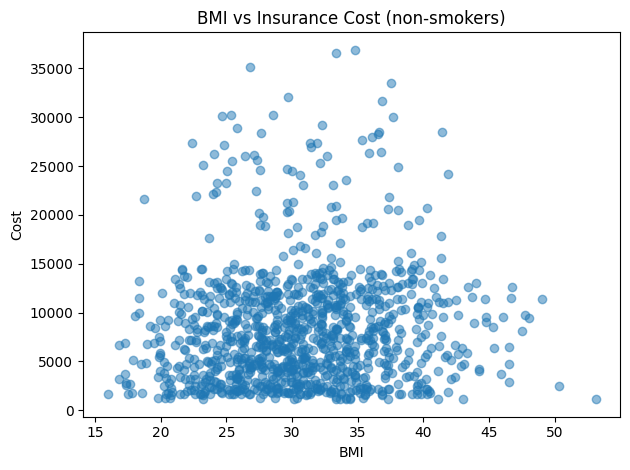

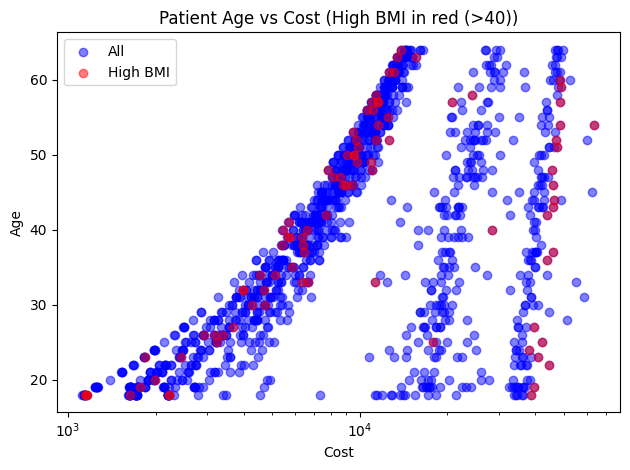

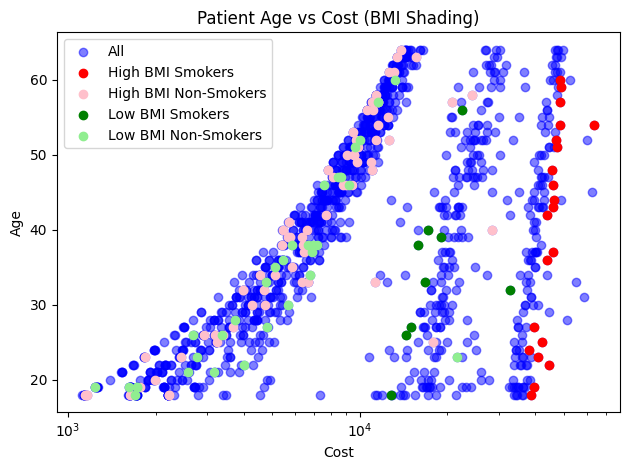

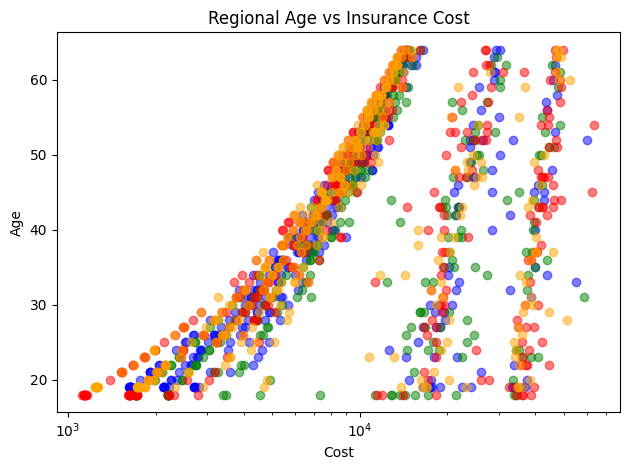

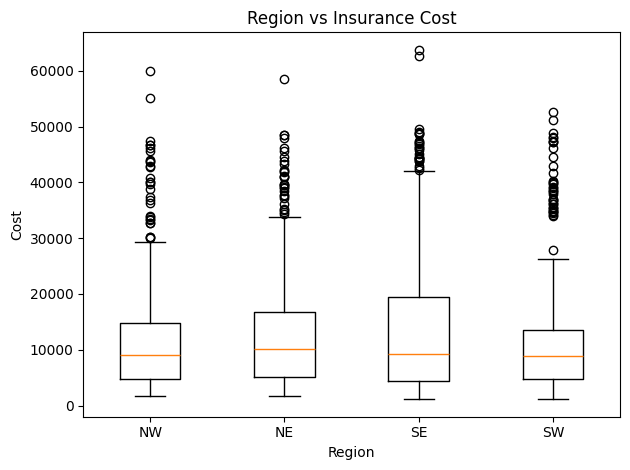

<Figure size 640x480 with 0 Axes>

In [47]:
# Assign Columns to variables for visualizing data
cost = insurance_df['charges']
age = insurance_df['age']
bmi = insurance_df['bmi']
smoker = insurance_df['smoker']
sex = insurance_df['sex']
region = insurance_df['region']
children = insurance_df['children']

male_cost = male_df['charges']
female_cost = female_df['charges']
male_age = male_df['age']
female_age = female_df['age']

# Sex v. Cost
plt.title('Patient Gender vs Insurance Cost')
plt.boxplot([male_cost,female_cost], showmeans=False,tick_labels=['Male','Female'])
plt.xlabel('Gender')
plt.ylabel('Cost')
plt.yscale('log')
plt.tight_layout()
plt.show()
plt.clf()


# Smoker Status v. Cost
plt.title('Smoker Status vs Insurance Cost')
plt.boxplot([smoker_df['charges'],non_smoker_df['charges']], showmeans=False,tick_labels=['Smokers','Non-Smokers'])
plt.xlabel('Smoker Status')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()
plt.clf()


# Age v. Cost (Smokers shaded)
plt.title('Patient Age vs Insurance Cost (smokers in green)')
plt.scatter(non_smoker_df['charges'],non_smoker_df['age'], alpha=0.5, color='blue')
plt.scatter(smoker_df['charges'],smoker_df['age'], alpha=0.5, color='green')
plt.xlabel('Cost')
plt.ylabel('Age')
plt.xscale('log')
plt.tight_layout()
plt.show()
plt.clf()


female_smoker = smoker_df[smoker_df['sex'] == 'female']
male_smoker = smoker_df[smoker_df['sex'] == 'male']
female_smoker_age = female_smoker['age']
male_smoker_age = male_smoker['age']
female_smoker_cost = female_smoker['charges']
male_smoker_cost = male_smoker['charges']

# Age v. Cost (Smokers shaded, Sex shaded)
plt.title('Patient Age vs Cost (Female smokers in green and male in red)')
plt.scatter(cost,age, alpha=0.5, color='blue')
plt.scatter(female_smoker_cost,female_smoker_age, alpha=0.5, color='green')
plt.scatter(male_smoker_cost,male_smoker_age, alpha=0.5, color='red')
plt.xlabel('Cost')
plt.ylabel('Age')
plt.xscale('log')
plt.tight_layout()
plt.show()
plt.clf()


children_df = pd.DataFrame({'children':children, 'cost':cost})
child_boxplot= [children_df[children_df['children'] == i]['cost'] for i in range(6)]

# Children v. Cost
plt.title('Number of Children vs Insurance Cost')
plt.boxplot(child_boxplot, showmeans=False,tick_labels=[str(i) for i in range(6)])
plt.tight_layout()
plt.show()
plt.clf()


# Consider BMI of smokers, perhaps that is what differentiates the two tiers
bmi_class = ['< 20','20 - 25','25 - 35','35 - 40','> 40']
bmi_list = []
for i in range(insurance_df.shape[0]):
    if bmi.iloc[i] <= 20:
        bmi_list.append('< 20')
    if 20 < bmi.iloc[i] <= 25:
        bmi_list.append('20 - 25')
    if 25 < bmi.iloc[i] <= 35:
        bmi_list.append('25 - 35')
    if 35 < bmi.iloc[i] <= 40:
        bmi_list.append('35 - 40')
    if 40 < bmi.iloc[i]:
        bmi_list.append('> 40')

bmi_df = pd.DataFrame({'bmi':bmi_list, 'cost':cost})
boxplot_data = [bmi_df[bmi_df['bmi'] == i]['cost'] for i in bmi_class]

# BMI v. Cost - Boxplot
plt.title('BMI vs Insurance Cost')
plt.boxplot(boxplot_data, showmeans=False,tick_labels=bmi_class)
plt.xlabel('BMI')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()
plt.clf()

# BMI v. Cost (non smokers) - Scatter
plt.title('BMI vs Insurance Cost (non-smokers)')
plt.scatter(non_smoker_df['bmi'],non_smoker_df['charges'],alpha = 0.5)
plt.xlabel('BMI')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()
plt.clf()


high_bmi_index = bmi_df[bmi_df['bmi'] == '> 40'].index
high_bmi = bmi.iloc[high_bmi_index]
high_bmi_cost = cost.iloc[high_bmi_index]
high_bmi_age = age.iloc[high_bmi_index]

# Age v. Cost (BMI Shaded)
plt.title('Patient Age vs Cost (High BMI in red (>40))')
plt.scatter(cost,age, alpha=0.5, color='blue')
plt.scatter(high_bmi_cost,high_bmi_age, alpha=0.5, color='red')
plt.legend(['All','High BMI'])
plt.xlabel('Cost')
plt.ylabel('Age')
plt.xscale('log')
plt.tight_layout()
plt.show()
plt.clf()

# BMI and COST
# high bmi smokers
high_bmi_smoker = smoker_df[smoker_df['bmi'] >= 40]
high_bmi_non_smoker = non_smoker_df[non_smoker_df['bmi'] >= 40]

hbs_cost = high_bmi_smoker['charges']
hbn_cost = high_bmi_non_smoker['charges']
hbs_age = high_bmi_smoker['age']
hbn_age = high_bmi_non_smoker['age']

# low bmi smokers
low_bmi_smoker = smoker_df[smoker_df['bmi'] < 20]
low_bmi_non_smoker = non_smoker_df[non_smoker_df['bmi'] < 20]

lbs_cost = low_bmi_smoker['charges']
lbn_cost = low_bmi_non_smoker['charges']
lbs_age = low_bmi_smoker['age']
lbn_age = low_bmi_non_smoker['age']

# Age v. Cost (BMI Shaded, Smokers Shaded)
plt.title('Patient Age vs Cost (BMI Shading)')
plt.scatter(cost,age, alpha=0.5, color='blue')
plt.scatter(hbs_cost,hbs_age, color='red')
plt.scatter(hbn_cost,hbn_age, color='pink')
plt.scatter(lbs_cost,lbs_age, color='green')
plt.scatter(lbn_cost,lbn_age, color='lightgreen')
plt.legend(['All','High BMI Smokers','High BMI Non-Smokers',
            'Low BMI Smokers','Low BMI Non-Smokers'])
plt.xlabel('Cost')
plt.ylabel('Age')
plt.xscale('log')
plt.tight_layout()
plt.show()
plt.clf()


#Consider the effects of region:
region_class = ['northwest','northeast','southeast','southwest']
region_class_ab = ['NW','NE','SE','SW']

nw_index = region[region == 'northwest'].index
ne_index = region[region == 'northeast'].index
se_index = region[region == 'southeast'].index
sw_index = region[region == 'southwest'].index

nw_cost = cost.iloc[nw_index]
ne_cost = cost.iloc[ne_index]
se_cost = cost.iloc[se_index]
sw_cost = cost.iloc[sw_index]

nw_age = age.iloc[nw_index]
ne_age = age.iloc[ne_index]
se_age = age.iloc[se_index]
sw_age = age.iloc[sw_index]

# Age v. Cost (Region Shaded)
plt.title('Regional Age vs Insurance Cost')
plt.scatter(nw_cost,nw_age, alpha=0.5, color='blue')
plt.scatter(ne_cost,ne_age, alpha=0.5, color='green')
plt.scatter(se_cost,se_age, alpha=0.5, color='red')
plt.scatter(sw_cost,sw_age, alpha=0.5, color='orange')
plt.xlabel('Cost')
plt.ylabel('Age')
plt.xscale('log')
plt.tight_layout()
plt.show()
plt.clf()

region_df = pd.DataFrame({'region':region, 'cost':cost})
boxplot_data = [region_df[region_df['region'] == i]['cost'] for i in region_class]

# Region v. Cost - Boxplot
plt.title('Region vs Insurance Cost')
plt.boxplot(boxplot_data, showmeans=False,tick_labels=region_class_ab)
plt.xlabel('Region')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()
plt.clf()




***
####
#### Summary of Initial Findings:
1. Smoker status has the largest impact on patient insurance cost. There appears to be two categories of elevated cost for smokers. Gender and BMI do not appear to be the differentiating factors for Smokers.
2. Age has a linear relationship with insurance cost.
3. Region may have an affect, the southeastern region has the greatest variance and highest median cost. Perhaps population ethnicity or race are factors, or maybe there is a higher average number of Smokers amongst this population.
4. Gender appears to have little impact on overall cost, the dataset is balanced as well with near 50:50 male and female.
5. Number of children has little impact on overall cost, the population with 5 children is so low that the lower average and variance can be accounted for with the lower population of smokers among that group.
###
***

### 2.0 Data Preprocessing: Categorical Features, Strings, Nulls

In [48]:
# Sex, Region, and Smoker need to be converted into categorical features
# NOTE: astype() assigns values alphabetically
# female (0) and male (1)
insurance_df['sex'] = insurance_df['sex'].astype('category').cat.codes
# non_smoker (0) and smoker (1)
insurance_df['smoker'] = insurance_df['smoker'].astype('category').cat.codes
# northeast (0), northwest (1), southeast (2), southwest (3)
insurance_df['region'] = insurance_df['region'].astype('category').cat.codes
print(insurance_df.head())


   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


### 2.0 Preparing Regression Models for Insurance Cost Prediction

In [49]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

rs = 0
X = insurance_df.drop(['charges'], axis=1)
y = insurance_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=rs)

# Verify the random state has an appropriate distribution of Smokers between test and train set.
# Smokers is an important feature so this is paramount to good modeling.
train_smoker_ratio = X_train['smoker'].value_counts().loc[1]/X_train.shape[0]
print(f'Training set Smoker percentage: {train_smoker_ratio * 100:.2f}%')
test_smoker_ratio = X_test['smoker'].value_counts().loc[1]/X_test.shape[0]
print(f'Testing set Smoker percentage: {test_smoker_ratio * 100:.2f}%')

""" After reviewing smoker distribution, current split will utilize random_state=0.
for i in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=i)
    train_smoker_ratio = X_train['smoker'].value_counts().loc['yes']/X_train.shape[0]
    test_smoker_ratio = X_test['smoker'].value_counts().loc['yes']/X_test.shape[0]
    delta_smoker_ratio = abs(train_smoker_ratio - test_smoker_ratio)
    print(f'{i} {'Go for it!' if delta_smoker_ratio < 0.01 else "Don't do it!"}')
"""
print(f'Random State: {rs}')

Training set Smoker percentage: 20.47%
Testing set Smoker percentage: 20.52%
Random State: 0


### 2.1 Lasso:

Lasso fit: 0.80
Lasso mean squared error: 31846381.32
Lasso scaled fit: 0.80
Lasso scaled mean squared error: 31846453.17
Lasso all scaled fit: 0.80
Lasso all scaled mean squared error: 31846263.14

           Coefficient
age        3576.536367
sex         -23.886784
bmi        2030.591856
children    536.756707
smoker    23568.233654
region     -288.415582


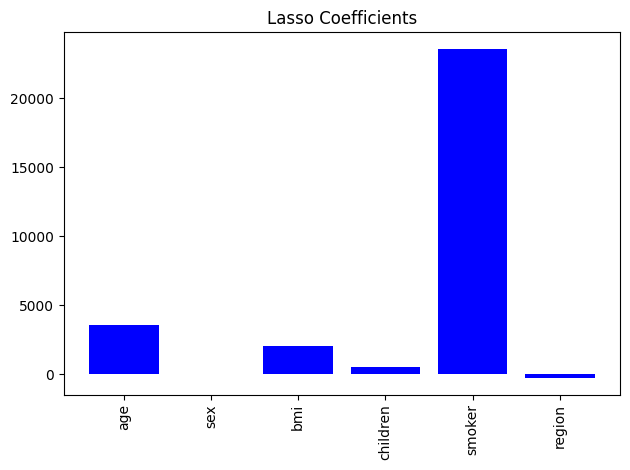

<Figure size 640x480 with 0 Axes>

In [50]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# NO SCALE
regr = Lasso(alpha=0.1)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print(f'Lasso fit: {regr.score(X_test,y_test):.2f}')
print(f'Lasso mean squared error: {mean_squared_error(y_test,y_pred):.2f}')

# SCALE ONLY CONTINUOUS FEATURES
continuous_features = ['age','bmi','children']
regr_scaled = Lasso(alpha=0.1)
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])

regr_scaled.fit(X_train_scaled,y_train)
y_pred_scaled = regr_scaled.predict(X_test_scaled)
print(f'Lasso scaled fit: {regr_scaled.score(X_test_scaled,y_test):.2f}')
print(f'Lasso scaled mean squared error: {mean_squared_error(y_test,y_pred_scaled):.2f}')

# SCALE ALL FEATURES
regr_all_scaled = Lasso(alpha=0.1)
X_train_all_scaled = scaler.fit_transform(X_train)
X_test_all_scaled = scaler.transform(X_test)
regr_all_scaled.fit(X_train_all_scaled,y_train)
print(f'Lasso all scaled fit: {regr_all_scaled.score(X_test_all_scaled,y_test):.2f}')
print(f'Lasso all scaled mean squared error: {mean_squared_error(y_test,regr_all_scaled.predict(X_test_all_scaled)):.2f}\n')


# As expected SMOKING is the most impactful feature.
coefs = pd.DataFrame(regr_scaled.coef_, index=X_train.columns, columns=['Coefficient'])
print(coefs)

plt.title('Lasso Coefficients')
plt.bar(coefs.index,coefs['Coefficient'],color='blue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.clf()


### 2.2 Linear Regression:

In [51]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print(f'Linear fit: {regr.score(X_test,y_test):.2f}')
print(f'Linear mean squared error: {mean_squared_error(y_test,y_pred):.2f}')

regr_scaled = LinearRegression()
regr_scaled.fit(X_train_scaled,y_train)
y_pred_scaled = regr_scaled.predict(X_test_scaled)
print(f'Linear scaled fit: {regr_scaled.score(X_test_scaled,y_test):.2f}')
print(f'Linear scaled mean squared error: {mean_squared_error(y_test,y_pred_scaled):.2f}')


Linear fit: 0.80
Linear mean squared error: 31845929.13
Linear scaled fit: 0.80
Linear scaled mean squared error: 31845929.13


### 2.3 Elastic Net:

In [52]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(alpha=0.01,l1_ratio=0.8)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print(f'Elastic Net fit: {regr.score(X_test,y_test):.2f}')
print(f'Elastic Net mean squared error: {mean_squared_error(y_test,y_pred):.2f}')

regr_scaled = ElasticNet(alpha=0.01,l1_ratio=0.8)
regr_scaled.fit(X_train_scaled,y_train)
y_pred_scaled = regr_scaled.predict(X_test_scaled)
print(f'Elastic Net scaled fit: {regr_scaled.score(X_test_scaled,y_test):.2f}')
print(f'Elastic Net scaled mean squared error: {mean_squared_error(y_test,y_pred_scaled):.2f}')


Elastic Net fit: 0.80
Elastic Net mean squared error: 31974939.49
Elastic Net scaled fit: 0.80
Elastic Net scaled mean squared error: 31979825.52


## Consider separating Smokers and Non-smokers into entirely separate models!
***
#### Thus far, only 80% accuracy using Lasso, LinearReg, ElasticNet with rs=0
#### Possible inspiration or insights: [Kaggle Insp](https://www.kaggle.com/code/eliasgath/insuarance)

Total population: 1338
Subclass size: 48

Ratio of subclass to total population: 3.59%

     age  sex     bmi  children  smoker  region      charges
3     33    1  22.705         0       0       1  21984.47061
102   18    0  30.115         0       0       0  21344.84670
140   34    1  22.420         2       0       0  27375.90478
143   29    1  29.735         2       0       1  18157.87600
219   24    0  23.210         0       0       2  25081.76784


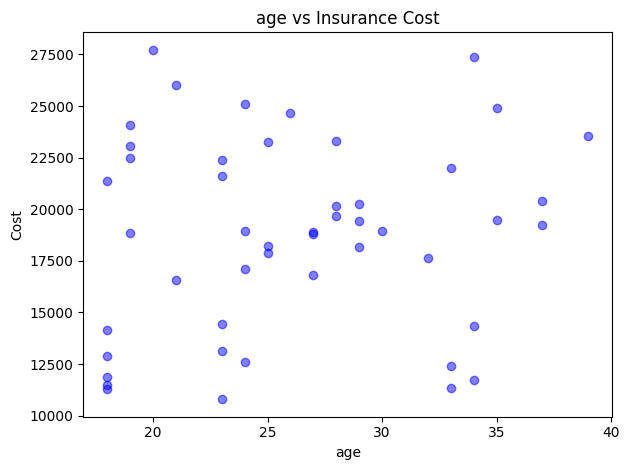

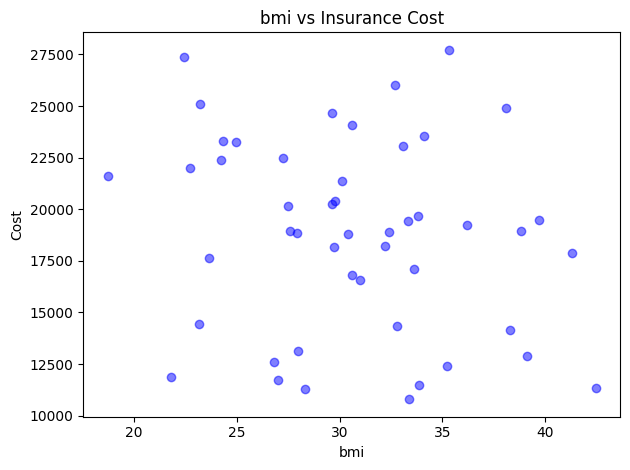

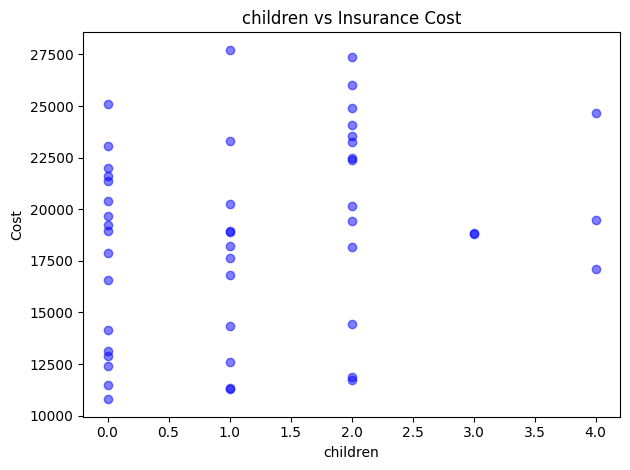

In [53]:
# Further EDA
# AS A REMINDER -->
# sex:(male(1) female(0))
# smoker:(yes(1) no(0))
# regions:(ne(0) nw(1) se(2) sw(3))

# INVESTIGATING HIGH COST, YOUNG, NON-SMOKERS
# Subclass population of Non-smokers, < 40 yo, and cost > 10000 ---> WHY
ins_df = insurance_df.copy()
total_population = ins_df.shape[0]
print(f'Total population: {total_population}')
# print(ins_df.head())

ins_df = ins_df.loc[ins_df['age'] < 40]
#print(ins_df.head())

ins_df = ins_df.loc[ins_df['charges'] > 10000]
#print(ins_df.head())

ins_df = ins_df.loc[ins_df['smoker'] == 0]
#print(ins_df.head())

# AS SHOWN, THIS SUB POPULATION IS NOT PREDICTABLE
subclass_size = ins_df.shape[0]
subclass_index = ins_df.index
print(f'Subclass size: {subclass_size}\n\n'
      f'Ratio of subclass to total population: '
      f'{subclass_size/total_population * 100:.2f}%\n')
print(ins_df.head())

age = ins_df['age']
charges = ins_df['charges']

num_features = ['age','bmi','children']
for num_feature in num_features:
    plt.title(f'{num_feature} vs Insurance Cost')
    plt.scatter(ins_df[num_feature], charges, alpha=0.5,color='blue')
    plt.ylabel('Cost')
    plt.xlabel(num_feature)
    plt.tight_layout()
    plt.show()


# TRIALING REMOVAL OF SUBCLASS
ins_good_df = insurance_df.copy()

good_index = list(set(list(ins_good_df.index)) - set(list(ins_df.index)))

ins_good_df = ins_good_df.iloc[good_index]
#print(ins_good_df.shape)

### Fitting with RandomForestRegressor - Total Population

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

X = insurance_df.drop(['charges'], axis=1)
y = insurance_df['charges']
rs = 0
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=rs)

#USING STANDARDSCALER:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('TOTAL POPULATION:')

reg = LinearRegression()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print(f'\nLinear (std scale) fit: {reg.score(X_test_scaled,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')

reg_rfr = RandomForestRegressor(random_state=rs)
reg_rfr.fit(X_train_scaled,y_train)
y_pred = reg_rfr.predict(X_test_scaled)
print(f'Random Forest (std scale) fit: {reg_rfr.score(X_test_scaled,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')


# USING MINMAXSCALER:
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

reg.fit(X_train_mm,y_train)
y_pred = reg.predict(X_test_mm)
print(f'\nLinear (minmax scale) fit: {reg.score(X_test_mm,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')

reg_rfr.fit(X_train_mm,y_train)
y_pred = reg_rfr.predict(X_test_mm)
print(f'Random Forest (minmax scale) fit: {reg_rfr.score(X_test_mm,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')


TOTAL POPULATION:

Linear (std scale) fit: 0.7999		MSE: 31.85 Million
Random Forest (std scale) fit: 0.8697		MSE: 20.73 Million

Linear (minmax scale) fit: 0.7999		MSE: 31.85 Million
Random Forest (minmax scale) fit: 0.8705		MSE: 20.60 Million


### Fitting with RandomForestRegressor - Without Subclass

In [58]:
# Fitting linear models to compare before and after subclass removal
X = ins_good_df.drop(['charges'], axis=1)
y = ins_good_df['charges']
rs = 0
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=rs)

# USING STANDARDSCALER:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('SUBCLASS REMOVED FROM POPULATION:')
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print(f'\nLinear fit: {reg.score(X_test_scaled,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')

reg_rfr = RandomForestRegressor(random_state=rs)
reg_rfr.fit(X_train_scaled,y_train)
y_pred = reg_rfr.predict(X_test_scaled)
print(f'Random Forest fit: {reg_rfr.score(X_test_scaled,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')


# USING MINMAXSCALER:
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)

reg.fit(X_train_mm,y_train)
y_pred = reg.predict(X_test_mm)
print(f'\nLinear MinMax scaled fit: {reg.score(X_test_mm,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')

reg_rfr.fit(X_train_mm,y_train)
y_pred = reg_rfr.predict(X_test_mm)
print(f'Random Forest MinMax scaled fit: {reg_rfr.score(X_test_mm,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')


SUBCLASS REMOVED FROM POPULATION:

Linear fit: 0.7936		MSE: 30.86 Million
Random Forest fit: 0.9013		MSE: 14.77 Million

Linear MinMax scaled fit: 0.7936		MSE: 30.86 Million
Random Forest MinMax scaled fit: 0.9009		MSE: 14.81 Million


***
- The **Subclass** (Non-smoker, < 40 yo, and cost > 10,000) adds unnecessary noise and removing the subclass (~3% of population) results in an accuracy score of 90% (compared to 87% accuracy when fitting with entire population)